<img src="majesty.jpg" width="500" height="300" align="right"/>

# Time Series Decomposition

Author: Christoph Güttner


**Abstract**  
Here, time series data is generated and described  
by the respective model. The model contains the  
trend and seasonal component extracted  
by seasonal decomposition.

http://colorlisa.com/


In [631]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

In [632]:
def generate_Seasonal_ARMA(p, q, m, a, b, c, sigma, n_samples):
    y = np.float64(np.random.normal(0,sigma, n_samples))
    epsilon = np.float64(np.random.normal(0,sigma, n_samples))

    for t in range(p+m, n_samples):
        sum = 0.0
        for i in range(1,p+1):
            sum += a[i-1] * y[(t-(i*m))]
        for j in range(1,q+1):
            epsilon[t-(j*m)] = np.float64(np.random.normal(0.0, sigma))
            sum += b[j-1] * epsilon[(t-(j*m))]
        epsilon[t] = np.float64(np.random.normal(0.0, sigma))
        y[t] = np.float64(c) + np.float64(epsilon[t]) + sum
    return y

def generate_ARMA(ts, p, q, a, b, c, sigma, n_samples):

    epsilon = np.float64(np.zeros(n_samples))

    for t in range(p, n_samples):
        sum = 0.0
        for i in range(1,p+1):
            sum += a[i-1] * ts[t-i]
        for j in range(1,q+1):
            epsilon[t-j] = np.float64(np.random.normal(0.0, sigma))
            sum += b[j-1] * epsilon[t-j]
        epsilon[t] = np.float64(np.random.normal(0.0, sigma))
        ts[t] = np.float64(c) + np.float64(epsilon[t]) + sum

    return ts



def get_seasonal_integration(ts, m):
    for i in range(m,len(ts)):
        ts[i]= (ts[i-1] + ts[i-1-m])/2
    return ts

def get_integration_order(ts, n_order):
    for i in range(n_order):
        ts = np.cumsum(np.array(ts))
    return ts

def dickey_fuller(ts):
    result = adfuller(ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [633]:

date_index = pd.date_range(start='1/1/2020', end='3/1/2021')
n_samples = len(date_index)

## Model Parameter

In [634]:
#parameter for SARIMA
p1=1
q1=1
a1=[0.66]
b1=[0.06]
#parameter for ARIMA
p=3
q=2
a=[0.45, 0.46, 0.03]
b=[0.02, 0.07]

c=0.0
y=0
sigma = 1.0


## Yellow_Time_Series

colors from:
    
MARILYN MONROE  
BY ANDY WARHOL

In [635]:
n_order=0
m=12*6

np.random.seed(3)

data = generate_Seasonal_ARMA(p, q,m, a, b, c, sigma,n_samples)
data = generate_ARMA(data, p1, q1, a1, b1, c, sigma,n_samples)
data = get_integration_order(data, n_order)
data = get_seasonal_integration(data, m)

## Data

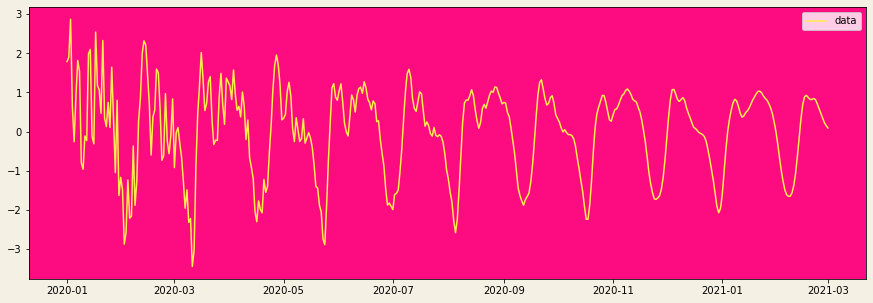

In [636]:
plt.figure(figsize=(15,5), facecolor='#F4F0E4')
plt.plot(date_index, data, color='#FFED4D', label='data')
ax = plt.gca()
ax.set_facecolor('#FD0C81')
plt.legend()

## Model and Data


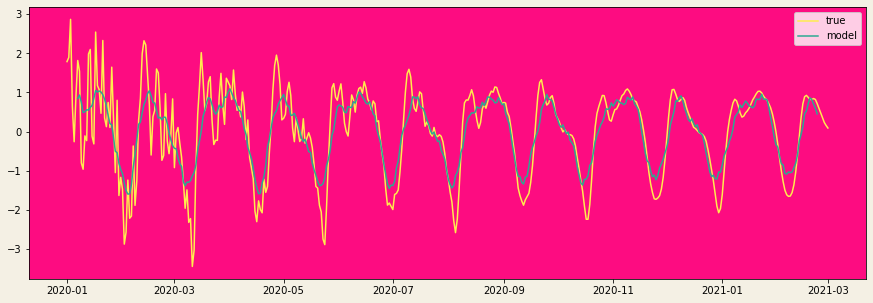

In [637]:
add_result = seasonal_decompose(data, model='additive',period=12)
true = data
model = add_result.trend+ add_result.seasonal

plt.figure(figsize=(15,5), facecolor='#F4F0E4')
plt.plot(date_index,true, color='#FFED4D', label='true')
plt.plot(date_index,model, color='#2BAA92', label='model')
ax = plt.gca()
ax.set_facecolor('#FD0C81')
plt.legend()

## Red_Time_Series

colors from:
    
HARLEM  
BY KARL ZERBE


In [638]:
n_order=1
m=12*8

np.random.seed(3)

data = generate_Seasonal_ARMA(p, q,m, a, b, c, sigma,n_samples)
data = generate_ARMA(data, p1, q1, a1, b1, c, sigma,n_samples)
data = get_integration_order(data, n_order)
data = get_seasonal_integration(data, m)

In [639]:
## Data

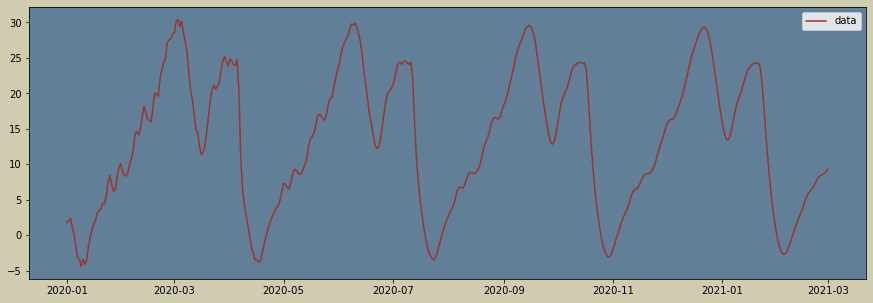

In [640]:
plt.figure(facecolor='#D0CCAF', figsize=(15,5))
plt.plot(date_index, data, color='#9A352D', label='data') 
ax = plt.gca()
ax.set_facecolor('#617F97')
plt.legend()

## Model and Data




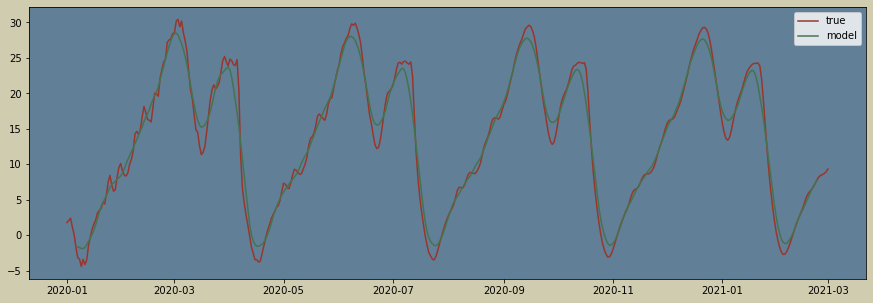

In [641]:
add_result = seasonal_decompose(data, model='additive',period=12)
true = data
model = add_result.trend+ add_result.seasonal

plt.figure(figsize=(15,5), facecolor='#D0CCAF')
plt.plot(date_index, true, color='#9A352D', label='true')
plt.plot(date_index, model, color='#46734F', label='model')
ax = plt.gca()
ax.set_facecolor('#617F97')
plt.legend()

## Blue_Time_Series 
colors from:
    
THE DREAM (Le Rêve)  
BY PABLO PICASSO

In [642]:
n_order=2
m=12*3

np.random.seed(3)

data = generate_Seasonal_ARMA(p, q,m, a, b, c, sigma,n_samples)
data = generate_ARMA(data, p1, q1, a1, b1, c, sigma,n_samples)
data = get_integration_order(data, n_order)
data = get_seasonal_integration(data, m)

## Data

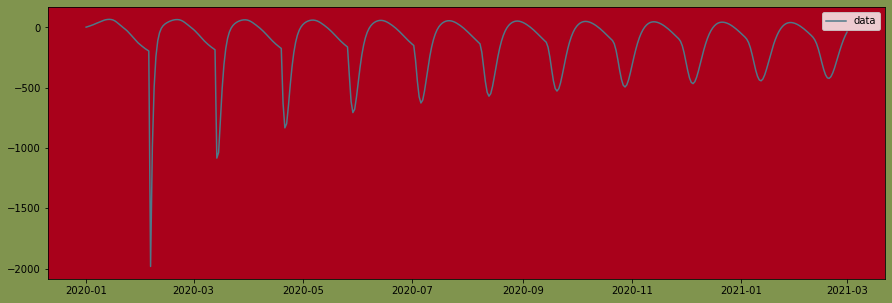

In [643]:
plt.figure(facecolor='#80944E', figsize=(15,5))
#for i in range(10):
plt.plot(date_index, data,color='#4E7989', label='data')
ax = plt.gca()
ax.set_facecolor('#A9011B')
plt.legend()

## Model and Data




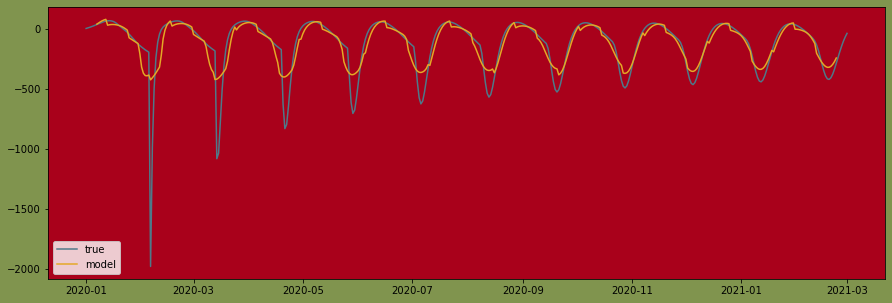

In [644]:
add_result = seasonal_decompose(data, model='additive',period=12)
true = data
model = add_result.trend+ add_result.seasonal

plt.figure(facecolor='#80944E', figsize=(15,5))
#for i in range(10):
plt.plot(date_index, true,color='#4E7989', label='true')
plt.plot(date_index, model,color='#E4A826', label='model')
ax = plt.gca()
ax.set_facecolor('#A9011B')
plt.legend()
